In [1]:
from functions import *
% matplotlib inline

# Evaluating Face Recognition Algorithms

Here we experiment with different algorithms to solve the problem of face recognition. 

Our dataset is split into increasing complexity levels and we run the algorithms for each one of them.

Most importantly, we compare the results of whether or not using Principal Component Analysis (PCA) to reduce the image dimensionality. 


## Direct Image Similarity

In [2]:
classifier = SimilarityClassifier()

### very-easy

In [3]:
dataset = './datasets/very-easy'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/very-easy
using PCA: NO
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.06666666666666667
  Average Time : 0.016467571258544922

##################################################
On dataset: ./datasets/very-easy
using PCA: YES
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.8666666666666666
  Average Time : 0.0014570236206054687



### easy

In [4]:
dataset = './datasets/easy'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/easy
using PCA: NO
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.5666666666666667
  Average Time : 0.04637429714202881

##################################################
On dataset: ./datasets/easy
using PCA: YES
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.775
  Average Time : 0.008603525161743165



### medium

In [5]:
dataset = './datasets/medium'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/medium
using PCA: NO
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.23714285714285716
  Average Time : 4.0373893737792965

##################################################
On dataset: ./datasets/medium
using PCA: YES
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.8114285714285714
  Average Time : 0.5765345811843872



### hard

In [6]:
dataset = './datasets/hard'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/hard
using PCA: NO
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.22285714285714286
  Average Time : 16.40150375366211

##################################################
On dataset: ./datasets/hard
using PCA: YES
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.8704761904761906
  Average Time : 2.2402484893798826



### extras

In [7]:
dataset = './datasets/extras/facebookfaces/crop-inner'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

dataset = './datasets/extras/facebookfaces/crop-outer'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

dataset = './datasets/extras/facebookfaces-2/crop-inner'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

dataset = './datasets/extras/facebookfaces-2/crop-outer'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-inner
using PCA: NO
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.2928571428571428
  Average Time : 0.08897864818572998

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-inner
using PCA: YES
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.6428571428571428
  Average Time : 0.010603976249694825

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-outer
using PCA: NO
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.1714285714285714
  Average Time : 0.06446173191070556

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-outer
using PCA: YES
classifier: SimilarityClassifier
10 fold cross-validation results:
  Average Score: 0.55714285

## Logistic Regression

In [4]:
classifier = LogisticRegression()

### very-easy

In [8]:
dataset = './datasets/very-easy'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/very-easy
using PCA: NO
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.8
  Average Time : 0.3082653284072876

##################################################
On dataset: ./datasets/very-easy
using PCA: YES
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 1.0
  Average Time : 0.0016953229904174804



### easy

In [9]:
dataset = './datasets/easy'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/easy
using PCA: NO
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 1.0
  Average Time : 0.9978229522705078

##################################################
On dataset: ./datasets/easy
using PCA: YES
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 1.0
  Average Time : 0.003708553314208984



### medium

In [ ]:
dataset = './datasets/medium'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/medium
using PCA: NO
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.841904761905
  Average Time : 107.23419196605683

##################################################
On dataset: ./datasets/medium
using PCA: YES
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.932380952381
  Average Time : 6.859637594223022



### hard

In [8]:
dataset = './datasets/hard'
#evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/hard
using PCA: YES
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.911428571429
  Average Time : 40.29245295524597



For the hard dataset, not using PCA results in extremely long runtime.

### extras

In [11]:
dataset = './datasets/extras/facebookfaces/crop-inner'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

dataset = './datasets/extras/facebookfaces/crop-outer'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

dataset = './datasets/extras/facebookfaces-2/crop-inner'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

dataset = './datasets/extras/facebookfaces-2/crop-outer'
evaluate_recognition(dataset, classifier, use_pca=False)
evaluate_recognition(dataset, classifier, use_pca=True)

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-inner
using PCA: NO
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.735714285714
  Average Time : 1.2831989765167235

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-inner
using PCA: YES
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.814285714286
  Average Time : 0.0046713829040527345

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-outer
using PCA: NO
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.778571428571
  Average Time : 1.1596403121948242

##################################################
On dataset: ./datasets/extras/facebookfaces/crop-outer
using PCA: YES
classifier: LogisticRegression
10 fold cross-validation results:
  Average Score: 0.721428571429
  Average Time :

# Playground

Recognition rate: 0.9333333333333333
Confusion Matrix:
[[1 0 0 0 0]
 [0 4 0 0 0]
 [0 0 3 0 0]
 [0 0 0 4 0]
 [0 0 1 0 2]]


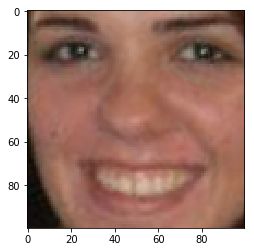

Actuall face  : 5
Predicted face: 5


In [15]:
source = './datasets/extras/facebookfaces-2/crop-inner'
img_name = '/5-10.png'

X, y = load_dataset(source)
pca = PCA()
X = pca.fit_transform(X)
model, score, cm = classify(X, y)

print("Recognition rate: %s" % score)
print("Confusion Matrix:")
print(cm)

img = load_image(source+img_name)
plt.imshow(img)
plt.show()
actual, predict = recognize_image(source+img_name, model, pca)
print("Actuall face  : %s" % actual)
print("Predicted face: %s" % predict)